In [6]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv('../data/comm7330_group_company.csv',encoding='GBK')
df.head()


,企业名称,经营状态,法定代表人,注册资本,成立日期,所属省份,所属城市,电话,更多电话,邮箱,统一社会信用代码,纳税人识别号,注册号,组织机构代码,参保人數,企业类型,所属行业,网址,企业地址,经营范围
0,萌萌码（重庆）教育科技有限公司,存续,罗啸,100万元人民币,2018/1/5,重庆,NaN,17388295244,NaN,17388295244@qq.com,91500107MA5YQ61525,91500107MA5YQ61525,5.000000e+14,MA5YQ615-2,2,有限责任公司,NaN,NaN,重庆市九龙坡区杨家坪珠江路48号1幢20-2#,计算机编程咨询;教育科技产品的开发与销售;计算机软硬件的技术开发、技术咨询、技术转让;计算机...
1,北京童天下教育科技有限公司,在业,郑奎,60.9756万元人民币,2018/3/12,北京,NaN,15811082328,NaN,freemanzk@163.com,91110108MA01AP246J,91110108MA01AP246J,1.100000e+14,MA01AP24-6,1,有限责任公司(自然人投资或控股),科技推广和应用服务业,www.daerhou.cn,北京市海淀区上地信息路1号(北京实创高科技发展总公司1-1号)A栋6层6464号,技术开发、技术推广、技术转让、技术咨询、技术服务;销售自行开发的产品;计算机系统服务;基础软...
2,天津五格教育科技有限责任公司,存续,张宇光,100万元人民币,2017/4/1,天津,NaN,13820990621,13920380657；,NaN,91120103MA05PFHB73,91120103MA05PFHB73,1.200000e+14,MA05PFHB-7,4,有限责任公司,科技推广和应用服务业,www.wugedianxia.com,天津市河西区徽州道29号(北方创客体验中心B座)2044,教育软件技术开发、技术咨询、技术转让及技术服务;教育信息咨询;企业管理咨询;组织文化艺术交流...
3,云南北岭科技有限公司,存续,杨康,100万元人民币,2018/4/24,云南,昆明市,13529201202,NaN,614495077@qq.com,91530102MA6N46WHX9,91530102MA6N46WHX9,NaN,MA6N46WH-X,0,有限责任公司(自然人投资或控股),零售业,www.edukings.cn,云南省昆明市五华区红云街道国福现代城荷花苑1栋1506室,计算机软硬件的开发及应用;信息系统集成服务;承办会议及商品的展览展示活动;组织文化艺术交流活...
4,镇安猫爪信息技术有限公司,在业,王林久,10万元人民币,2015/12/4,陕西,商洛市,13720655098,NaN,support@kidscode.cn,91611025MA70T0NQ7N,91611025MA70T0NQ7N,6.130000e+14,MA70T0NQ-7,0,有限责任公司(自然人独资),软件和信息技术服务业,NaN,陕西省商洛市镇安县永乐街道办新城社区岭南路113号3层,计算机软件开发、销售;网站、网页设计、制作;数据统计分析;信息系统集成服务及维护;信息技术咨...


In [9]:
df.shape

(401, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 20 columns):
企业名称        401 non-null object
经营状态        401 non-null object
法定代表人       400 non-null object
注册资本        357 non-null object
成立日期        401 non-null object
所属省份        401 non-null object
所属城市        356 non-null object
电话          162 non-null object
更多电话        50 non-null object
邮箱          117 non-null object
统一社会信用代码    401 non-null object
纳税人识别号      401 non-null object
注册号         150 non-null float64
组织机构代码      393 non-null object
参保人數        401 non-null int64
企业类型        401 non-null object
所属行业        357 non-null object
网址          97 non-null object
企业地址        401 non-null object
经营范围        401 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 62.7+ KB


In [11]:
#给省份赋值，方便用数值做统计。
df['省份赋值'] = 1

In [12]:
df.columns

Index(['企业名称', '经营状态', '法定代表人', '注册资本', '成立日期', '所属省份', '所属城市', '电话', '更多电话',
       '邮箱', '统一社会信用代码', '纳税人识别号', '注册号', '组织机构代码', '参保人數', '企业类型', '所属行业',
       '网址', '企业地址', '经营范围', '省份赋值'],
      dtype='object')

In [13]:
to_drop = ['法定代表人', '注册资本', '成立日期','所属城市','电话',
       '更多电话', '邮箱', '统一社会信用代码', '纳税人识别号', '注册号', '组织机构代码', '参保人數', '企业类型',
       '所属行业', '网址','企业地址']

df.drop(to_drop, inplace=True, axis=1)

In [14]:
df.columns

Index(['企业名称', '经营状态', '所属省份', '经营范围', '省份赋值'], dtype='object')

In [15]:
#删去“注销”和“迁出”企业
enterprise_amount = df.loc[(df["经营状态"] != "注销") & (df["经营状态"] != "迁出"), ["企业名称", "经营状态" , "所属省份", "经营范围","省份赋值"]]
enterprise_amount.head()

,企业名称,经营状态,所属省份,经营范围,省份赋值
0,萌萌码（重庆）教育科技有限公司,存续,重庆,计算机编程咨询;教育科技产品的开发与销售;计算机软硬件的技术开发、技术咨询、技术转让;计算机...,1
1,北京童天下教育科技有限公司,在业,北京,技术开发、技术推广、技术转让、技术咨询、技术服务;销售自行开发的产品;计算机系统服务;基础软...,1
2,天津五格教育科技有限责任公司,存续,天津,教育软件技术开发、技术咨询、技术转让及技术服务;教育信息咨询;企业管理咨询;组织文化艺术交流...,1
3,云南北岭科技有限公司,存续,云南,计算机软硬件的开发及应用;信息系统集成服务;承办会议及商品的展览展示活动;组织文化艺术交流活...,1
4,镇安猫爪信息技术有限公司,在业,陕西,计算机软件开发、销售;网站、网页设计、制作;数据统计分析;信息系统集成服务及维护;信息技术咨...,1


In [16]:
enterprise_amount.to_csv('../data/cleaned_compc.csv',encoding='GBK')

In [17]:
enterprise_amount.shape

(392, 5)

In [12]:

summarized_enterprise = enterprise_amount.groupby(by = '所属省份')['省份赋值'].sum()
summarized_enterprise.sort_values(ascending=False, inplace = True)
summarized_enterprise.head()


所属省份
广东    78
浙江    77
江苏    31
安徽    24
上海    19
Name: 省份赋值, dtype: int64

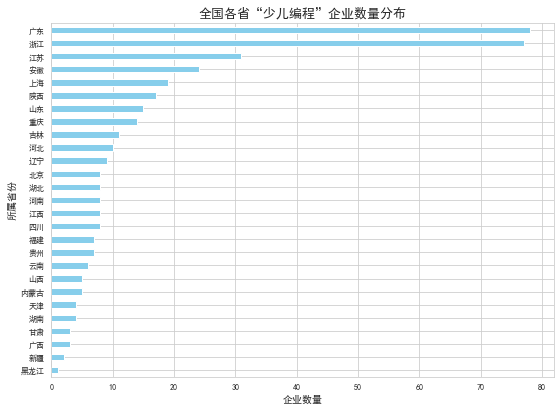

In [22]:
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif']=['SimHei']
summarized_enterprise.plot(kind = 'barh', rot = 0, fontsize =8, sharex = False, sharey = True,color = 'skyblue',legend = False,figsize=(9,6.5))
plt.xlabel('企业数量', fontsize =10,)
plt.title('全国各省“少儿编程”企业数量分布', fontsize =13)
plt.gca().invert_yaxis()
plt.savefig('./comp.jpg')
plt.show() 
